# Breast Cancer Survival Analysis
Penny Yang, Danwen Li, Xinyu Li

In [1]:
import pandas as pd

dataset = pd.read_csv('./BRCA.csv')
dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [2]:
dataset.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

### 1. Data Wrangling

#### drop all missing values and unused column

In [3]:
dataset = dataset.dropna()   # delete all missing values
dataset = dataset.drop('Patient_ID', axis=1) # delete the first column 'Patient_ID'

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(5), object(10)
memory usage: 39.6+ KB


#### add a new column, compute the time since surgery to last visit
#### drop columns 'Date_of_Last_Visit' and 'Date_of_Surgery'

In [5]:
# add a new column, compute the time since surgery to last visit
dataset['Date_of_Last_Visit'] = pd.to_datetime(dataset['Date_of_Last_Visit'], format='%d-%b-%y')
dataset['Date_of_Surgery'] = pd.to_datetime(dataset['Date_of_Surgery'], format='%d-%b-%y')
dataset['Days Between Surgery And Last_Visit'] = (dataset['Date_of_Last_Visit'] - dataset['Date_of_Surgery']).dt.days
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Days Between Surgery And Last_Visit
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,155
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,562
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,274
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,168
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,782


In [6]:
# define a variable for some data visualizations
data = dataset.copy()
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Days Between Surgery And Last_Visit
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,155
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,562
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,274
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,168
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,782


In [7]:
# drop columns: Date_of_Last_Visit and Date_of_Surgery
columns_drop = ['Date_of_Last_Visit', 'Date_of_Surgery']
dataset.drop(columns = columns_drop, inplace = True)
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Days Between Surgery And Last_Visit
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,155
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead,562
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,274
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive,168
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,782


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  317 non-null    float64
 1   Gender                               317 non-null    object 
 2   Protein1                             317 non-null    float64
 3   Protein2                             317 non-null    float64
 4   Protein3                             317 non-null    float64
 5   Protein4                             317 non-null    float64
 6   Tumour_Stage                         317 non-null    object 
 7   Histology                            317 non-null    object 
 8   ER status                            317 non-null    object 
 9   PR status                            317 non-null    object 
 10  HER2 status                          317 non-null    object 
 11  Surgery_type                    

#### convert String columns to Numeric values

In [9]:
# convert 'Negative' to 0 and 'Positive' to 1 in multiple columns: ER status, PR status, HER2 status
dataset.replace({'Negative': 0, 'Positive': 1}, inplace = True)

# convert 'Alive' to 1, 'Dead' to 0 in 'Patient_Status'
dataset.replace({'Dead': 0, 'Alive': 1}, inplace = True)

dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Days Between Surgery And Last_Visit
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,1,155
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,1,1,0,Lumpectomy,0,562
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,1,1,0,Other,1,274
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,1,168
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,1,1,0,Other,0,782


In [10]:
gender = dataset['Gender'].unique()
tumour = dataset['Tumour_Stage'].unique()
histology = dataset['Histology'].unique()
surgeryType = dataset['Surgery_type'].unique()
print('gender: ', gender, '\n\ntumour: ', tumour, '\n\nhistology: ', histology, '\n\nsurgery type: ', surgeryType)

gender:  ['FEMALE' 'MALE'] 

tumour:  ['III' 'II' 'I'] 

histology:  ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma'] 

surgery type:  ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']


In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Use fit_transform to convert string columns to numerical values
original_encoded_data = encoder.fit_transform(dataset[['Gender', 'Tumour_Stage', 'Histology', 'Surgery_type']])
# Assign the transformed data back to the columns in the original DataFrame
dataset[['Gender', 'Tumour_Stage', 'Histology', 'Surgery_type']] = original_encoded_data

dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Days Between Surgery And Last_Visit
0,36.0,0.0,0.080353,0.42638,0.54715,0.273680,2.0,0.0,1,1,0,1.0,1,155
1,43.0,0.0,-0.420320,0.57807,0.61447,-0.031505,1.0,2.0,1,1,0,0.0,0,562
2,69.0,0.0,0.213980,1.31140,-0.32747,-0.234260,2.0,0.0,1,1,0,2.0,1,274
3,56.0,0.0,0.345090,-0.21147,-0.19304,0.124270,1.0,0.0,1,1,0,1.0,1,168
4,56.0,0.0,0.221550,1.90680,0.52045,-0.311990,1.0,0.0,1,1,0,2.0,0,782


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  317 non-null    float64
 1   Gender                               317 non-null    float64
 2   Protein1                             317 non-null    float64
 3   Protein2                             317 non-null    float64
 4   Protein3                             317 non-null    float64
 5   Protein4                             317 non-null    float64
 6   Tumour_Stage                         317 non-null    float64
 7   Histology                            317 non-null    float64
 8   ER status                            317 non-null    int64  
 9   PR status                            317 non-null    int64  
 10  HER2 status                          317 non-null    int64  
 11  Surgery_type                    

In [13]:
dataset.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Days Between Surgery And Last_Visit
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.0,317.0,317.000000,317.000000,317.000000,317.000000
mean,58.725552,0.012618,-0.027232,0.949557,-0.095104,0.006713,1.053628,0.331230,1.0,1.0,0.091483,1.507886,0.804416,447.776025
std,12.827374,0.111797,0.543858,0.906153,0.589027,0.625965,0.656246,0.546047,0.0,0.0,0.288750,1.039155,0.397276,386.279467
min,29.000000,0.000000,-2.144600,-0.978730,-1.627400,-2.025500,0.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,-0.350600,0.368840,-0.531360,-0.382240,1.000000,0.000000,1.0,1.0,0.000000,1.000000,1.000000,189.000000
50%,58.000000,0.000000,0.005649,0.997130,-0.193040,0.038522,1.000000,0.000000,1.0,1.0,0.000000,2.000000,1.000000,372.000000
75%,67.000000,0.000000,0.336260,1.612000,0.251210,0.436250,1.000000,1.000000,1.0,1.0,0.000000,2.000000,1.000000,595.000000
max,90.000000,1.000000,1.593600,3.402200,2.193400,1.629900,2.000000,2.000000,1.0,1.0,1.000000,3.000000,1.000000,3019.000000


### 2. Data Visualizations

#### heatmap

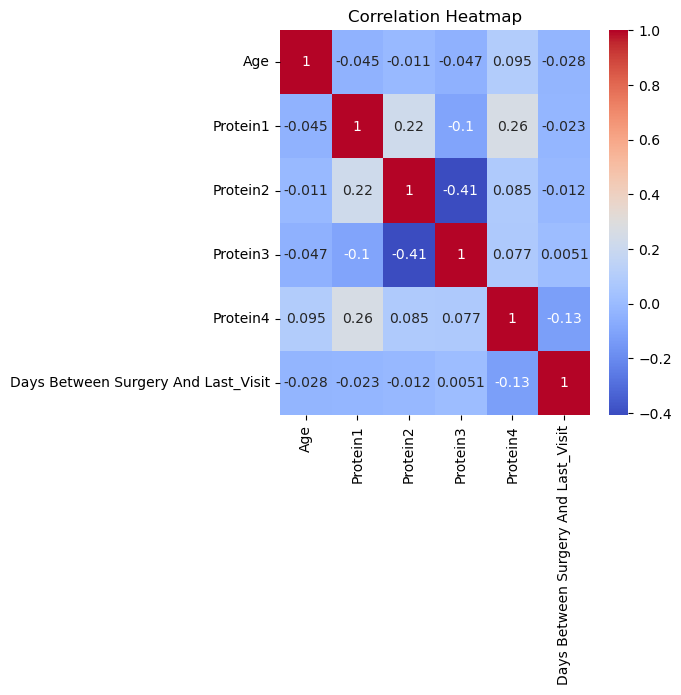

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculating the correlation matrix
correlation_matrix = dataset[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Days Between Surgery And Last_Visit']].corr()

# Creating a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Histogram

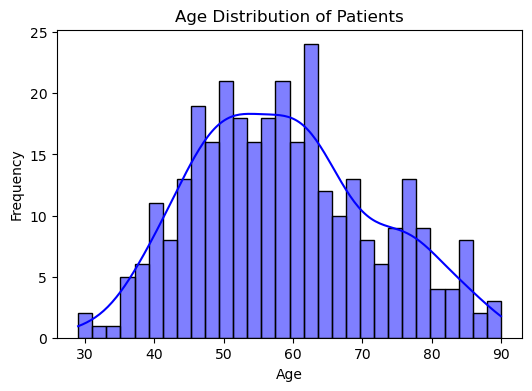

In [15]:
# Histogram for showing age distribution of patients
plt.figure(figsize=(6, 4))
sns.histplot(dataset['Age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### pie chart

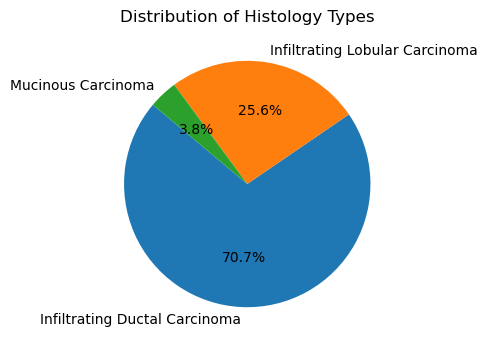

In [16]:
# Counting the values in the Histology column
histology_counts = data['Histology'].value_counts()

# Creating a pie chart
plt.figure(figsize=(4, 4))
plt.pie(histology_counts, labels=histology_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Histology Types")
plt.show()

#### box plot

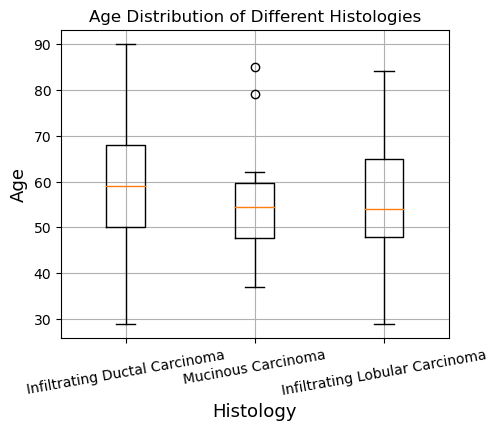

In [17]:
import numpy as np

data1 = data[data.Histology == 'Infiltrating Ductal Carcinoma']
data2 = data[data.Histology == 'Mucinous Carcinoma']
data3 = data[data.Histology == 'Infiltrating Lobular Carcinoma']

data = [data1.Age, data2.Age, data3.Age]

plt.figure(figsize=(5, 4))

plt.boxplot(data)

plt.xticks([1, 2, 3], ['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma', 'Infiltrating Lobular Carcinoma'], rotation = 10)

plt.title('Age Distribution of Different Histologies')
plt.xlabel('Histology', fontsize = 13)
plt.ylabel('Age', fontsize = 13)

plt.grid()
plt.show()

#### scatter plot

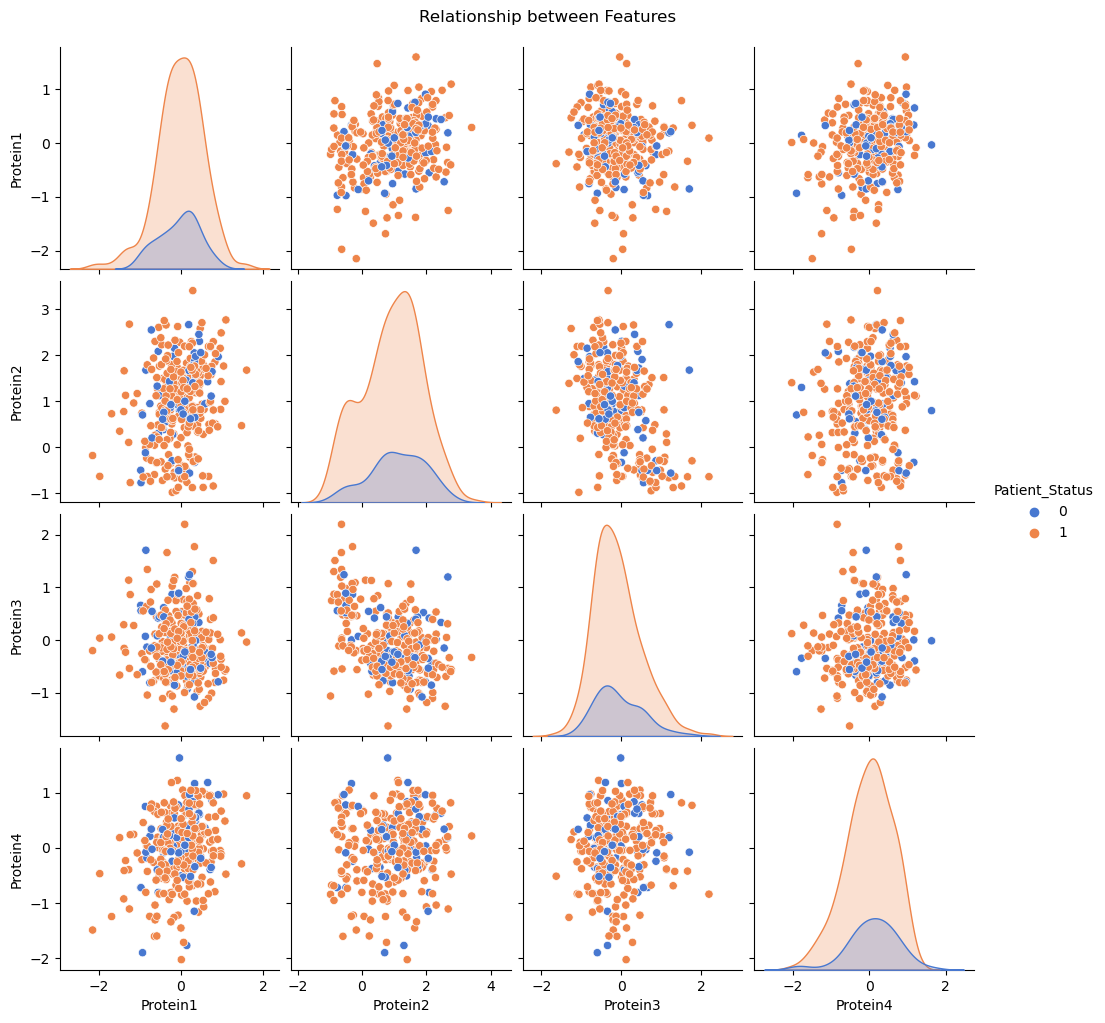

In [18]:
columns = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

sns.pairplot(dataset[columns + ['Patient_Status']], hue = 'Patient_Status', palette='muted')
plt.suptitle('Relationship between Features', y = 1.02)
plt.show()

### 3. Predictive Analytics

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting data
x = dataset.drop(columns = ['Patient_Status'], axis = 1)
y = dataset['Patient_Status']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state=42)

#### SVM

In [20]:
# Adopt SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
model = SVC()
model.fit(xtrain, ytrain)
ypredicted = model.predict(xtest)
accuracy_score(ytest,ypredicted)

0.828125

In [21]:
f1_score(ytest, ypredicted)

0.905982905982906

#### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=20)
forest.fit(xtrain, ytrain)
y_pred = forest.predict(xtest)
accuracy_score(ytest, y_pred)

0.8125

In [23]:
f1_score(ytest, y_pred)

0.8965517241379309

#### SMOTE

In [24]:
from collections import Counter

Counter(dataset['Patient_Status'])

Counter({1: 255, 0: 62})

In [25]:
Counter(ytrain)

Counter({1: 202, 0: 51})

In [26]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
scores = cross_val_score(model, xtrain, ytrain, scoring = 'precision', cv = cv, n_jobs = -1)
print('Mean accuracy: %.3f' % mean(scores))

Mean accuracy: 0.798


In [29]:

for k in range(1,8):
    # define pipeline
    model = LogisticRegression()
    over = SMOTE(k_neighbors=k)
    under = RandomUnderSampler()
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, xtrain, ytrain, scoring='precision', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean accuracy: %.3f' % (k, score))

> k=1, Mean accuracy: 0.791
> k=2, Mean accuracy: 0.784
> k=3, Mean accuracy: 0.791
> k=4, Mean accuracy: 0.775
> k=5, Mean accuracy: 0.798
> k=6, Mean accuracy: 0.790
> k=7, Mean accuracy: 0.777
